## Alhajuela Lake Bed Sedimentation Prediction

In [54]:
import sys
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing


1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [55]:
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)

1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [56]:
df = pd.read_csv('data/Fin1v8.csv', delim_whitespace=False, header=0)

In [57]:
df.keys()

Index(['x', 'y', 'hOG', 'year', 'slope', 'aspect', 'T', 'dRM1', 'dRM2', 'dRM3',
       'dRM4', 'dRM5', 'dRM6', 'dRM7', 'dRMtot', 'Xfactor', 'dh', 'depth',
       'Unnamed: 18'],
      dtype='object')

In [58]:
df.head()

,x,y,hOG,year,slope,aspect,T,dRM1,dRM2,dRM3,dRM4,dRM5,dRM6,dRM7,dRMtot,Xfactor,dh,depth,Unnamed: 18
0,"655,559.71","1,015,911.65",663.63,2008,0.35,180.00,11,"16,204.93","16,088.46","12,588.49","7,720.53","10,685.86","9,201.77","6,142.22","78,632.26",10,1.00,357.63,NaN
1,"655,584.71","1,015,911.65",663.63,2008,3.94,278.92,11,"16,201.95","16,088.57","12,588.64","7,730.47","10,682.52","9,197.89","6,128.26","78,618.29",10,0.99,357.63,NaN
2,"655,609.71","1,015,911.65",667.03,2008,7.63,329.48,11,"16,199.02","16,088.72","12,588.83","7,740.48","10,679.24","9,194.07","6,114.36","78,604.72",10,1.55,361.03,NaN
3,"655,634.71","1,015,911.65",667.03,2008,12.34,0.00,11,"16,196.12","16,088.91","12,589.07","7,750.56","10,676.01","9,190.33","6,100.53","78,591.53",10,1.59,361.03,NaN
4,"655,659.71","1,015,911.65",667.03,2008,15.54,48.72,11,"16,193.26","16,089.14","12,589.36","7,760.70","10,672.84","9,186.65","6,086.78","78,578.73",10,0.81,361.03,NaN


In [59]:
col_study = ['x', 'y', 'hOG', 'year', 'slope', 'aspect', 'T', 'dRM1',
       'dRM2', 'dRM3', 'dRM4', 'dRM5', 'dRM6', 'dRM7', 'dRMtot', 'depth','Xfactor']
param_study = 'dh'

In [60]:
#sns.pairplot(df);
#plt.show()

# Correlation Analysis and Feature Selection

In [61]:
pd.options.display.float_format = '{:,.3f}'.format

In [62]:
df.corr()

,x,y,hOG,year,slope,aspect,T,dRM1,dRM2,dRM3,dRM4,dRM5,dRM6,dRM7,dRMtot,Xfactor,dh,depth,Unnamed: 18
x,1.000,0.254,0.356,0.000,-0.375,0.133,-0.000,-0.294,-0.212,-0.120,0.573,-0.179,-0.150,-0.251,-0.193,0.000,0.014,0.356,0.384
y,0.254,1.000,0.384,0.000,-0.127,0.022,-0.000,-0.993,-0.986,-0.882,0.405,-0.681,-0.331,0.694,-0.760,-0.000,0.000,0.384,0.382
hOG,0.356,0.384,1.000,0.112,0.008,-0.001,-0.064,-0.391,-0.372,-0.312,0.360,-0.236,-0.085,0.229,-0.251,-0.017,0.025,1.000,0.967
year,0.000,0.000,0.112,1.000,-0.000,0.000,-0.606,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.115,0.445,0.112,NaN
slope,-0.375,-0.127,0.008,-0.000,1.000,-0.072,-0.000,0.148,0.124,0.080,-0.216,0.086,0.060,0.082,0.106,0.000,-0.041,0.008,-0.027
aspect,0.133,0.022,-0.001,0.000,-0.072,1.000,-0.000,-0.032,-0.018,-0.001,0.086,-0.013,-0.013,-0.048,-0.015,0.000,0.055,-0.001,0.033
T,-0.000,-0.000,-0.064,-0.606,-0.000,-0.000,1.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.721,-0.327,-0.064,NaN
dRM1,-0.294,-0.993,-0.391,-0.000,0.148,-0.032,-0.000,1.000,0.994,0.906,-0.386,0.725,0.387,-0.641,0.801,0.000,0.000,-0.391,-0.389
dRM2,-0.212,-0.986,-0.372,-0.000,0.124,-0.018,-0.000,0.994,1.000,0.936,-0.317,0.755,0.420,-0.649,0.828,0.000,0.002,-0.372,-0.368
dRM3,-0.120,-0.882,-0.312,-0.000,0.080,-0.001,-0.000,0.906,0.936,1.000,-0.034,0.917,0.664,-0.458,0.948,-0.000,0.004,-0.312,-0.308


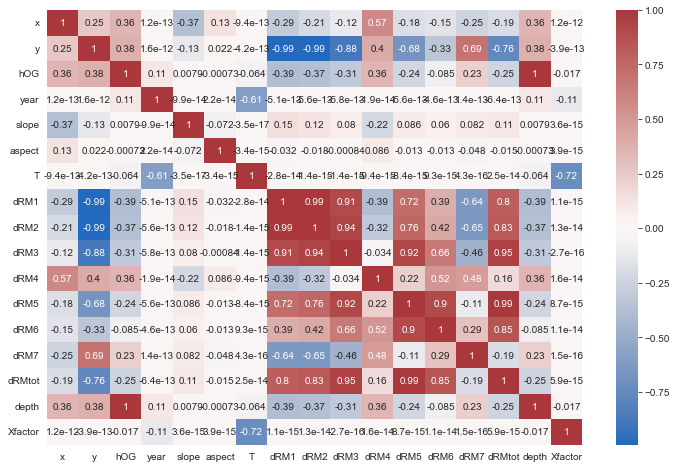

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df[col_study].corr(), annot=True, cmap="vlag")
plt.show()

---

# Evaluating Regression Model Performance

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X, y = df[col_study], df[param_study]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
print(X_train.shape)

(132153, 17)


In [68]:
print(y_train.shape)

(132153,)


# Correlation Matrix

#### Useful daigrnostic tool to identify colinearity between predictors

In [69]:
#samples = sklearn.utils.resample(df, n_samples=1000, random_state=None, stratify=None)

In [70]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

,x,y,hOG,year,slope,aspect,T,dRM1,dRM2,dRM3,dRM4,dRM5,dRM6,dRM7,dRMtot,Xfactor,dh,depth,Unnamed: 18
x,1.00,0.25,0.36,0.00,-0.37,0.13,-0.00,-0.29,-0.21,-0.12,0.57,-0.18,-0.15,-0.25,-0.19,0.00,0.01,0.36,0.38
y,0.25,1.00,0.38,0.00,-0.13,0.02,-0.00,-0.99,-0.99,-0.88,0.40,-0.68,-0.33,0.69,-0.76,-0.00,0.00,0.38,0.38
hOG,0.36,0.38,1.00,0.11,0.01,-0.00,-0.06,-0.39,-0.37,-0.31,0.36,-0.24,-0.09,0.23,-0.25,-0.02,0.02,1.00,0.97
year,0.00,0.00,0.11,1.00,-0.00,0.00,-0.61,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.11,0.44,0.11,NaN
slope,-0.37,-0.13,0.01,-0.00,1.00,-0.07,-0.00,0.15,0.12,0.08,-0.22,0.09,0.06,0.08,0.11,0.00,-0.04,0.01,-0.03
aspect,0.13,0.02,-0.00,0.00,-0.07,1.00,-0.00,-0.03,-0.02,-0.00,0.09,-0.01,-0.01,-0.05,-0.02,0.00,0.05,-0.00,0.03
T,-0.00,-0.00,-0.06,-0.61,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.72,-0.33,-0.06,NaN
dRM1,-0.29,-0.99,-0.39,-0.00,0.15,-0.03,-0.00,1.00,0.99,0.91,-0.39,0.72,0.39,-0.64,0.80,0.00,0.00,-0.39,-0.39
dRM2,-0.21,-0.99,-0.37,-0.00,0.12,-0.02,-0.00,0.99,1.00,0.94,-0.32,0.76,0.42,-0.65,0.83,0.00,0.00,-0.37,-0.37
dRM3,-0.12,-0.88,-0.31,-0.00,0.08,-0.00,-0.00,0.91,0.94,1.00,-0.03,0.92,0.66,-0.46,0.95,-0.00,0.00,-0.31,-0.31


In [71]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,x,y,hOG,year,slope,aspect,T,dRM1,dRM2,dRM3,dRM4,dRM5,dRM6,dRM7,dRMtot,Xfactor,dh,depth,Unnamed: 18
x,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
y,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.99,-0.99,-0.88,0.00,-0.68,0.00,0.69,-0.76,0.00,0.00,0.00,0.00
hOG,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.97
year,0.00,0.00,0.00,1.00,0.00,0.00,-0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
slope,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aspect,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
T,0.00,0.00,0.00,-0.61,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.72,0.00,0.00,NaN
dRM1,0.00,-0.99,0.00,0.00,0.00,0.00,0.00,1.00,0.99,0.91,0.00,0.72,0.00,-0.64,0.80,0.00,0.00,0.00,0.00
dRM2,0.00,-0.99,0.00,0.00,0.00,0.00,0.00,0.99,1.00,0.94,0.00,0.76,0.00,-0.65,0.83,0.00,0.00,0.00,0.00
dRM3,0.00,-0.88,0.00,0.00,0.00,0.00,0.00,0.91,0.94,1.00,0.00,0.92,0.66,0.00,0.95,0.00,0.00,0.00,0.00


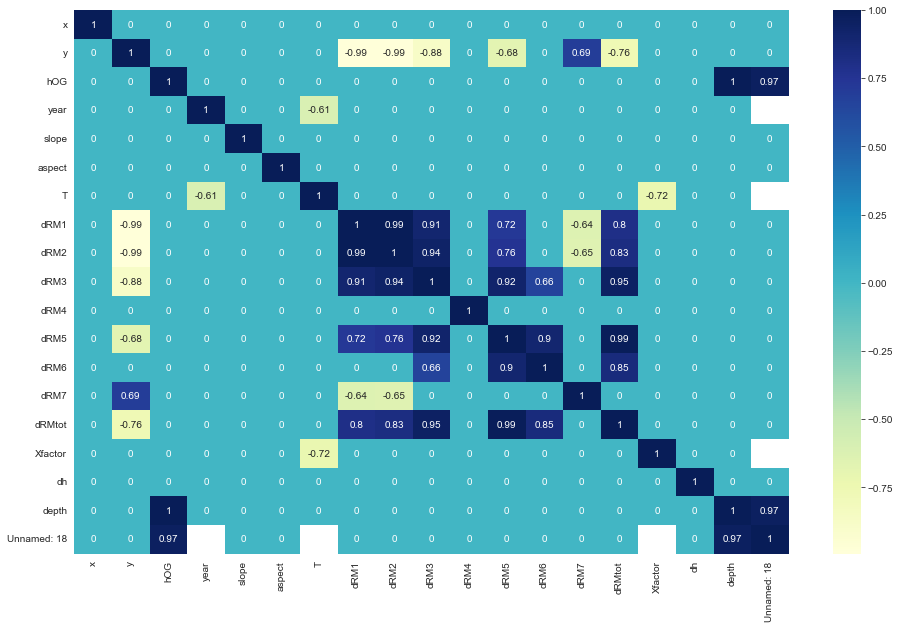

In [72]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

---

# **Random Forest**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [77]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [78]:
y_train_pred = forest.predict(X_train)

In [79]:
y_test_pred = forest.predict(X_test)

In [80]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 0.7207, test: 5.4616


In [81]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

R^2 train: 0.9734, test: 0.8012


In [82]:
forest.feature_importances_

array([0.10399292, 0.02961173, 0.08691107, 0.0856161 , 0.08479524,
       0.08502789, 0.09864273, 0.02460706, 0.02555665, 0.03257107,
       0.07038411, 0.0225597 , 0.05339355, 0.05816909, 0.02226567,
       0.08541991, 0.03047551])

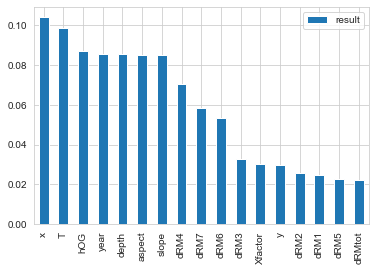

In [83]:
result = pd.DataFrame(forest.feature_importances_,  df[col_study].columns)
result.columns = ['result']
result.sort_values(by='result', ascending=False).plot(kind='bar');

---

In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. For very low values of gamma, you can see that both the training score and the validation score are low. This is called underfitting. Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. If gamma is too high, the classifier will overfit, which means that the training score is good but the validation score is poor.

## Future prediction

In [84]:
dfTrain = sklearn.utils.resample(df[df.year < 2017], n_samples=15000, random_state=None, stratify=None)
Xo = dfTrain[col_study]
yo = dfTrain[param_study]
dfTest = sklearn.utils.resample(df[df.year > 2017], n_samples=15000, random_state=None, stratify=None)

Xt = dfTest[col_study]
yt = dfTest[param_study]
X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.3, random_state=42)

### Forest training

In [85]:
forest2 = RandomForestRegressor()
forest2.fit(X_traino, y_traino)

y_train_pred = forest2.predict(X_traino)
y_test_pred = forest2.predict(X_testo)
y_pred = forest2.predict(Xt)


In [86]:
mean_absolute_error(y_pred, yt)

NameError: name 'mean_absolute_error' is not defined

In [87]:
r2_score(yt, y_pred)

-1.8346763719320833

In [88]:
print(y_train_pred.shape," ",y_traino.shape," ",y_test_pred.shape," ",y_testo.shape)

(10500,)   (10500,)   (4500,)   (4500,)


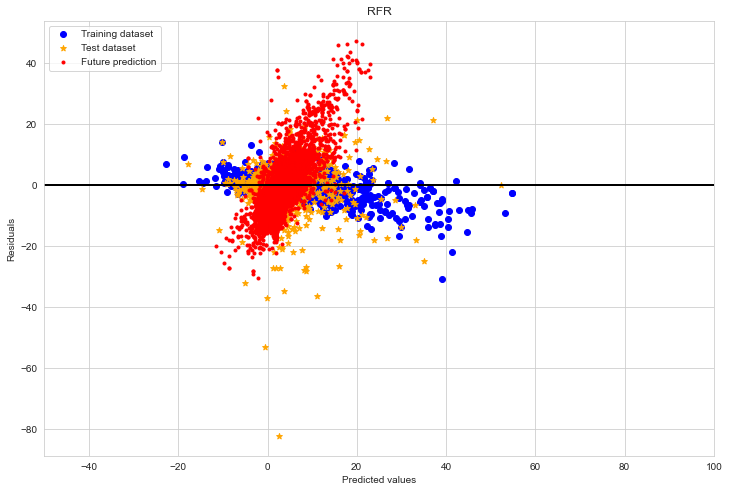

In [89]:
plt.figure(figsize=(12,8))
plt.title('RFR')
plt.scatter(y_train_pred, y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(y_test_pred, y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(y_pred, y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-50, 100])
plt.show()

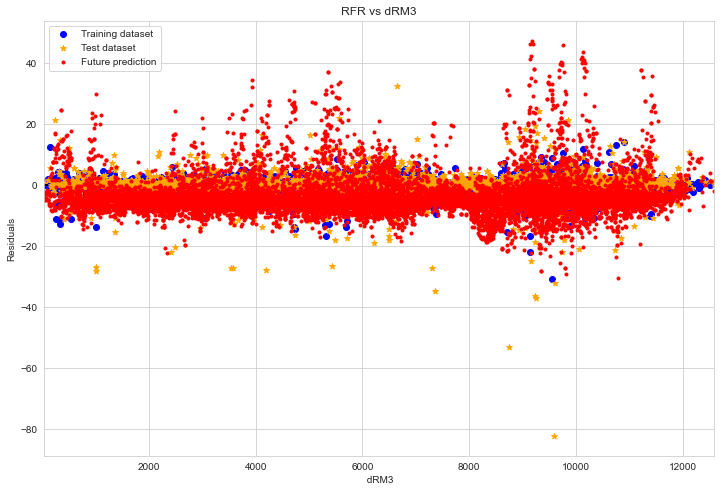

In [90]:
#forest2 = RandomForestRegressor()
#forest2.fit(X_traino, y_traino)

#y_train_pred = forest2.predict(X_traino)
#y_test_pred = forest2.predict(X_testo)
#y_pred = forest2.predict(Xt)

plt.figure(figsize=(12,8))
plt.title('RFR vs dRM3')
plt.scatter(X_traino['dRM3'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['dRM3'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['dRM3'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel(' dRM3')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([Xt['dRM3'].values.min(), Xt['dRM3'].values.max()])
plt.show()

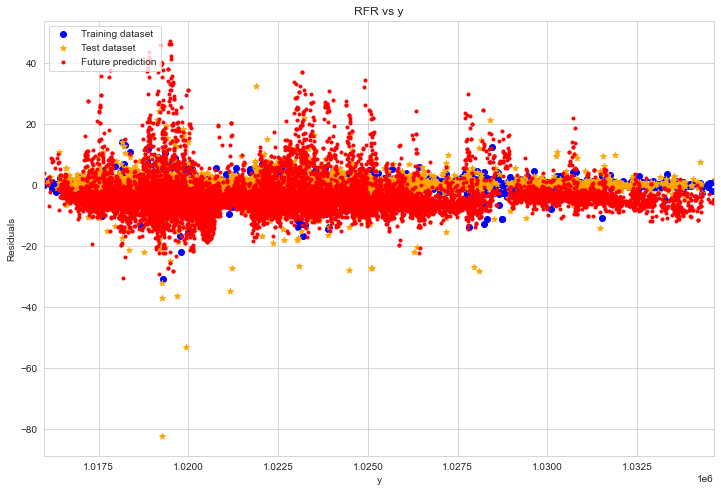

In [91]:
plt.figure(figsize=(12,8))
plt.title('RFR vs y')
plt.scatter(X_traino['y'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['y'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['y'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['y'].values.min(), X_traino['y'].values.max()])
plt.show()

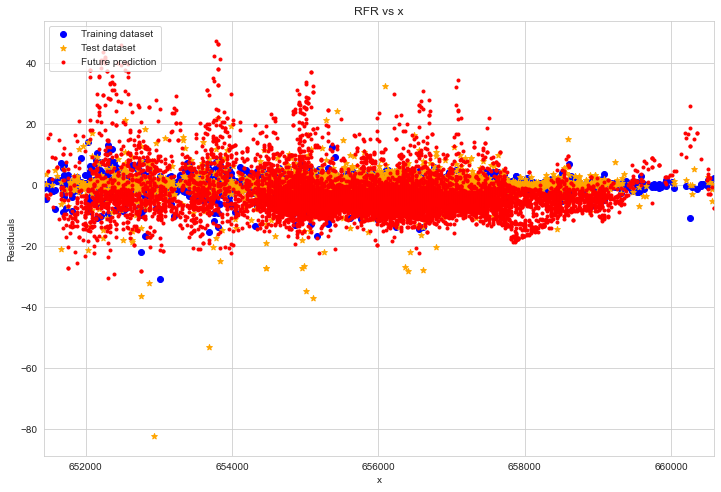

In [92]:
plt.figure(figsize=(12,8))
plt.title('RFR vs x')
plt.scatter(X_traino['x'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['x'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['x'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['x'].values.min(), X_traino['x'].values.max()])
plt.show()

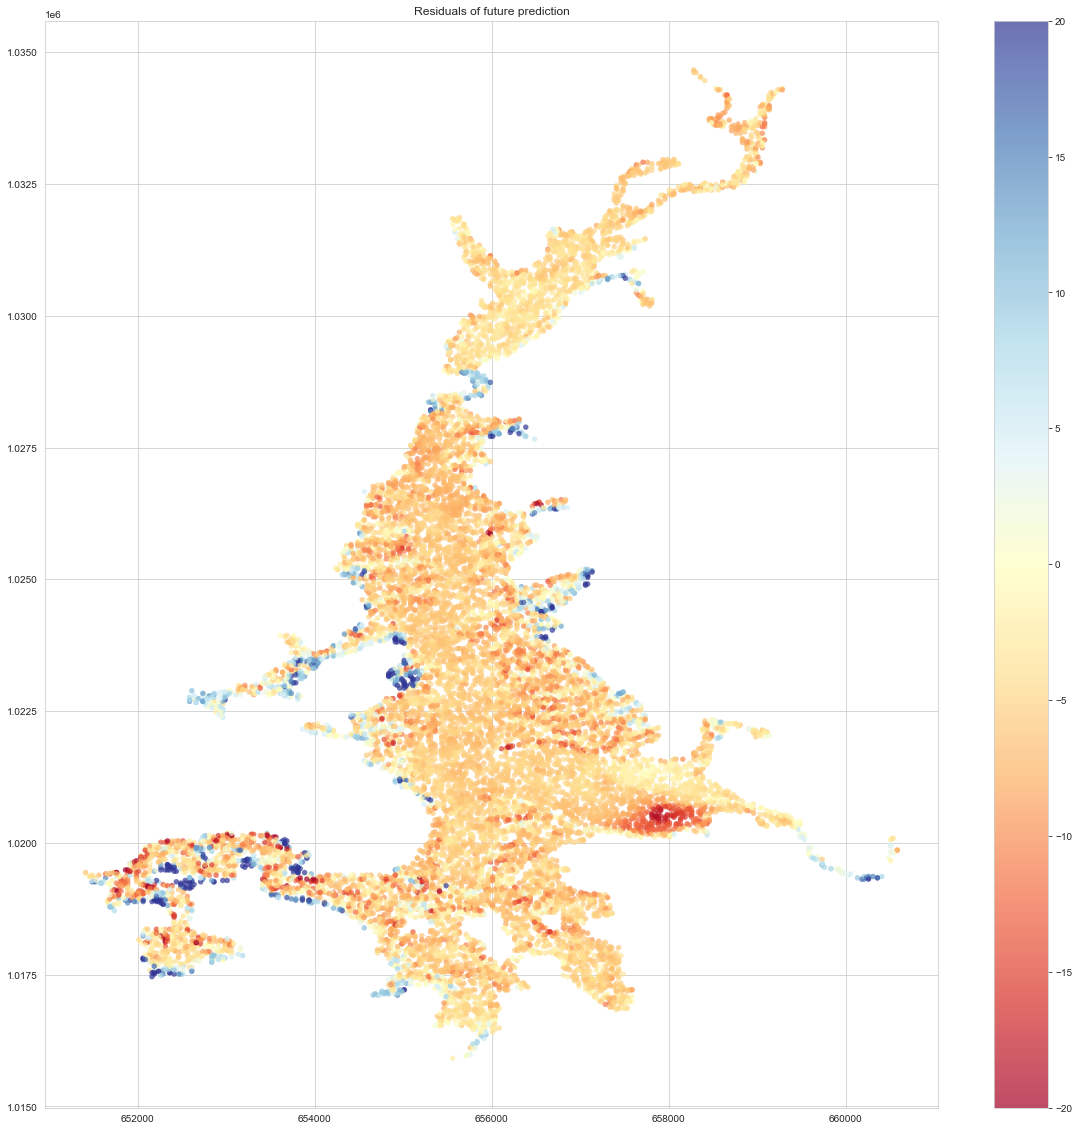

In [93]:
fig = plt.figure(figsize=(20, 20))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=( y_pred - yt),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('Residuals of future prediction')
plt.show()

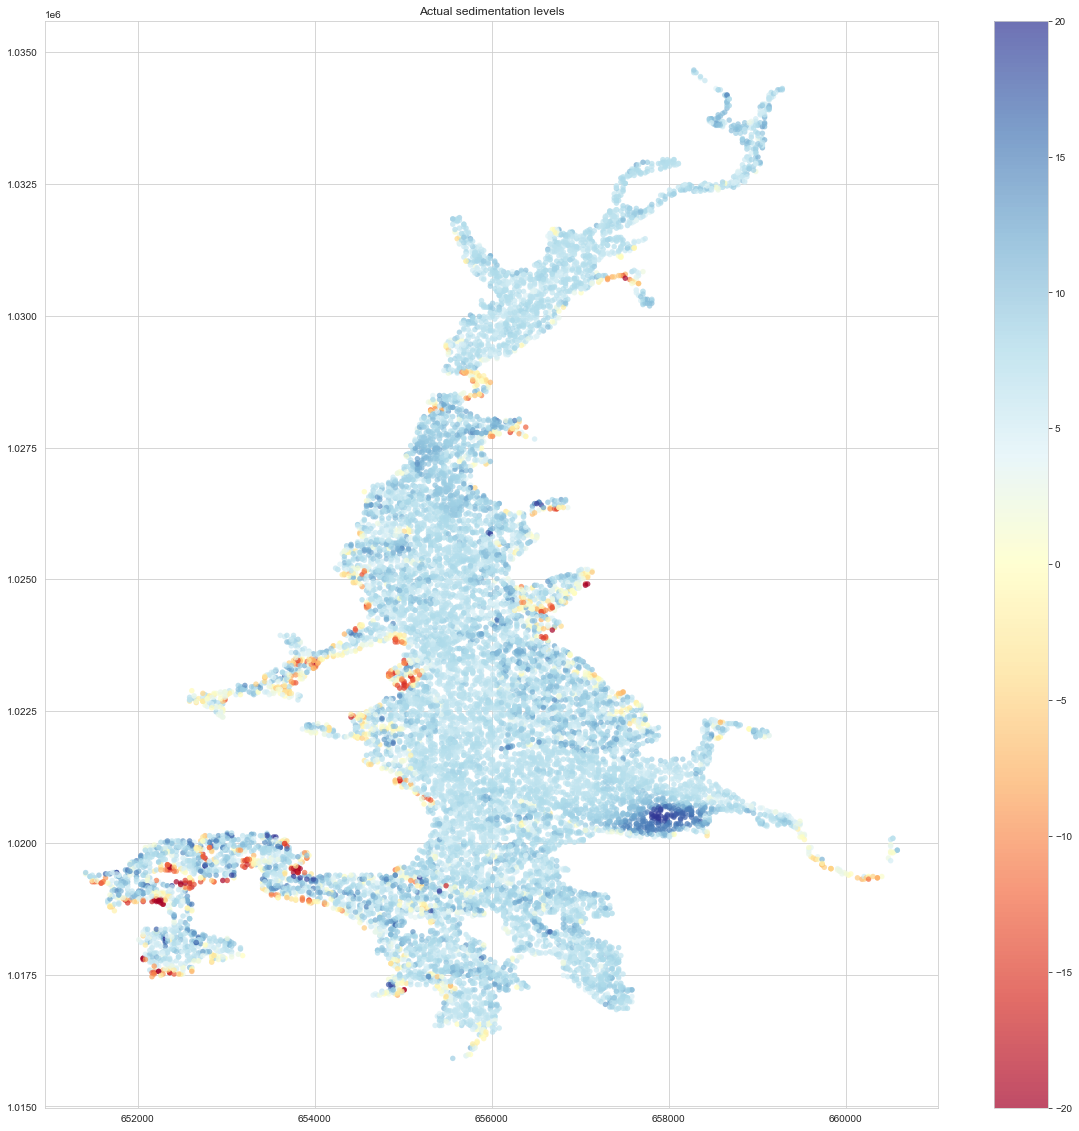

In [105]:
fig = plt.figure(figsize=(20, 20))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(yt),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('Actual sedimentation levels')
plt.show()

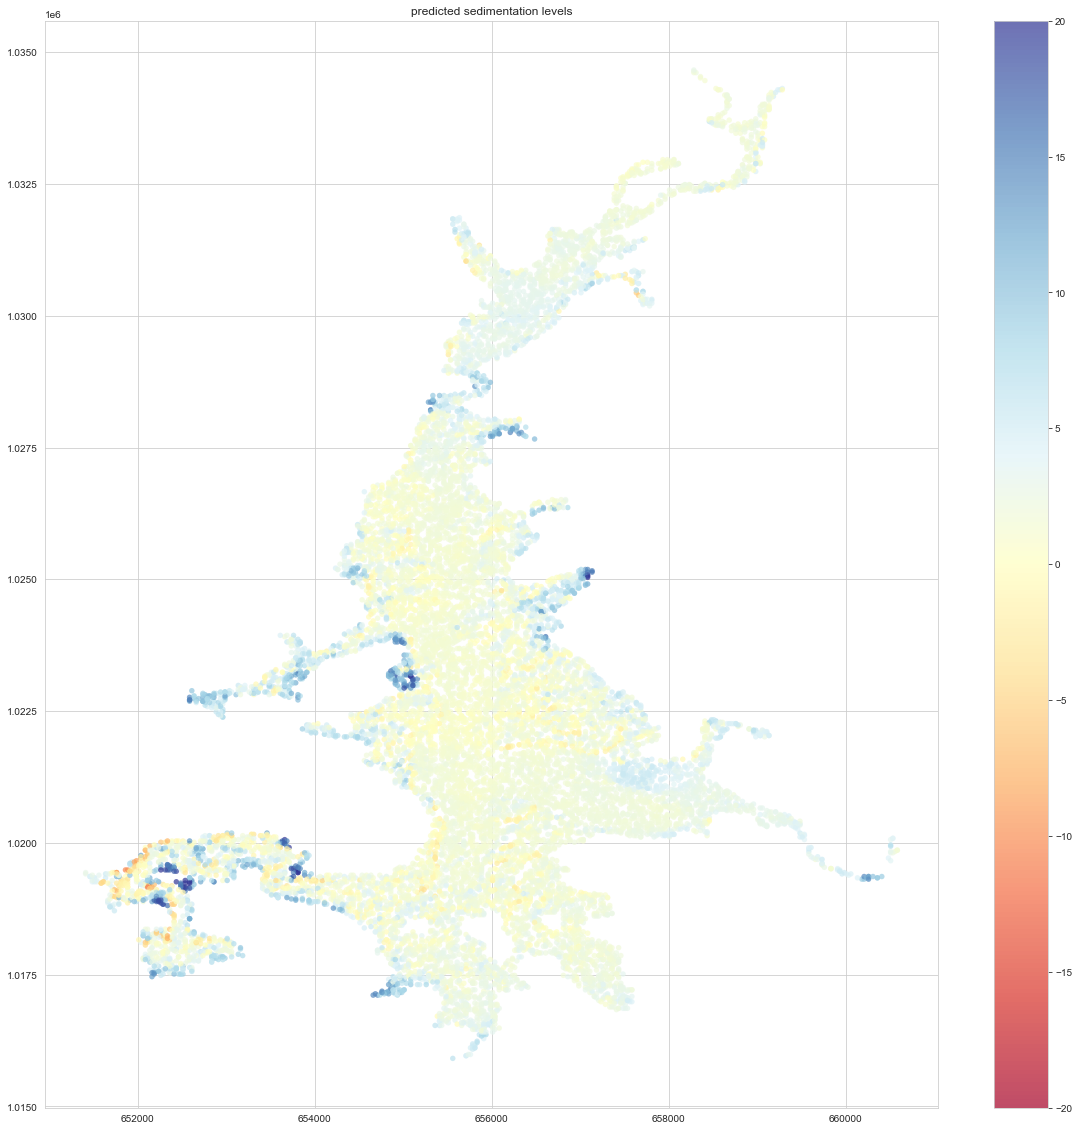

In [98]:
fig = plt.figure(figsize=(20, 20))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(y_pred),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('predicted sedimentation levels')
plt.show()

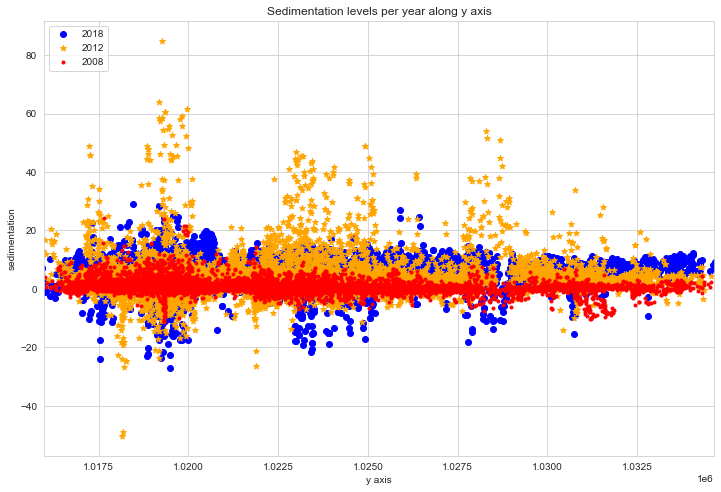

In [100]:
df18 = sklearn.utils.resample(df[df.year == 2018], n_samples=10000, random_state=None, stratify=None)
df12 = sklearn.utils.resample(df[df.year == 2012], n_samples=10000, random_state=None, stratify=None)
df08 = sklearn.utils.resample(df[df.year == 2008], n_samples=10000, random_state=None, stratify=None)
#df97 = sklearn.utils.resample(df[df.year == 1997], n_samples=10000, random_state=None, stratify=None)

plt.figure(figsize=(12,8))
plt.title('Sedimentation levels per year along y axis')
plt.scatter(df18['y'], df18['dh'], c='blue', marker='o', label='2018')
plt.scatter(df12['y'], df12['dh'], c='orange', marker='*', label='2012')
plt.scatter(df08['y'], df08['dh'], c='red', marker='.', label='2008')
#plt.scatter(df97['y'], df97['dh'], c='yellow', marker='.', label='1997')
#plt.scatter(Xt['y'], y_pred, c='green', marker='*', label='2018 pred')
plt.xlabel('y axis')
plt.ylabel('sedimentation')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['y'].values.min(), X_traino['y'].values.max()])
plt.show()

C:\Users\neder\Anaconda3\envs\geemap\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


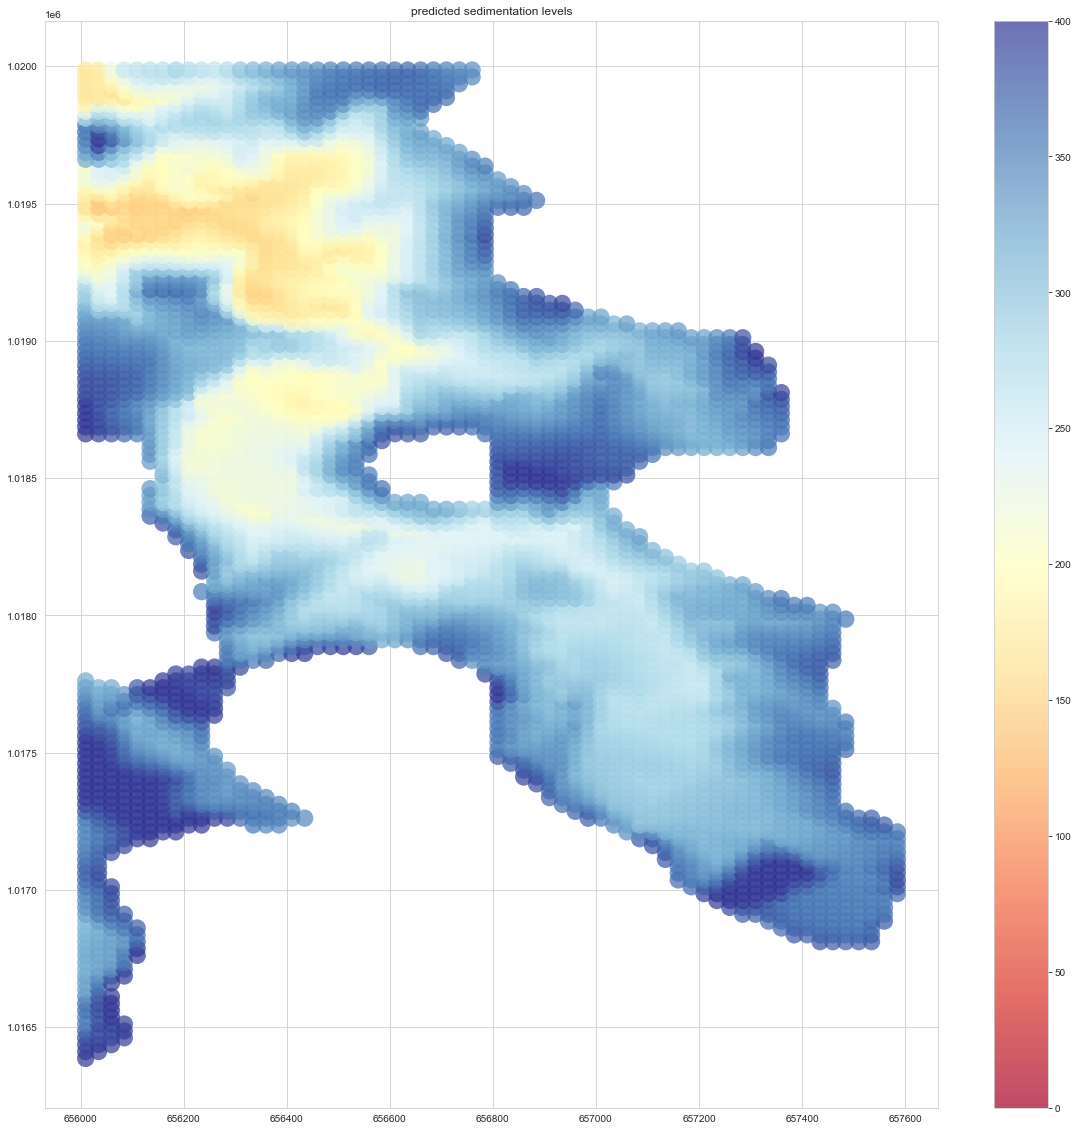

In [101]:
dftrial = df[656000 < df.x][df.x < 658000][df.year == 2018][1020000 > df.y]
fig = plt.figure(figsize=(20, 20))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(dftrial['x'], dftrial['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 300,
           c=(dftrial['depth']-dftrial['dh']+5),
            cmap=cm)
plt.clim(0, 400)
plt.colorbar(sc)
plt.title('predicted sedimentation levels')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa0c114688>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa0c114588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa094d8dc8>,
 'medians': [<matplotlib.lines.Line2D at 0x1fa0c114308>,
 'fliers': [],
 'means': []}

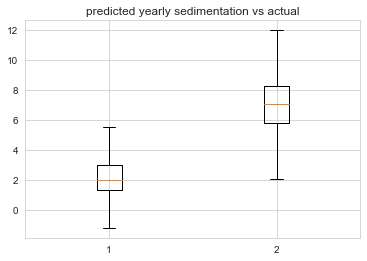

In [102]:
fig4, ax4 = plt.subplots()
ax4.set_title('predicted yearly sedimentation vs actual')
ax4.boxplot([y_pred, yt], showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa091e0308>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa091e0908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa091e0388>,
 'medians': [<matplotlib.lines.Line2D at 0x1fa091e0b08>,
 'fliers': [],
 'means': []}

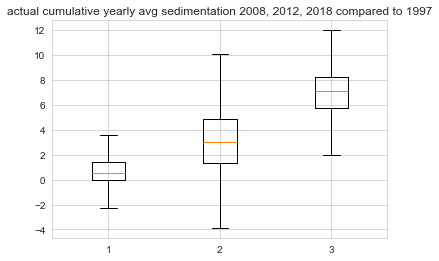

In [106]:
fig4, ax4 = plt.subplots()
ax4.set_title('actual cumulative yearly avg sedimentation 2008, 2012, 2018 compared to 1997')
ax4.boxplot([df08['dh'],df12['dh'],df18['dh']], showfliers=False)